In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
np.random.seed(42)
a0 = 1.5
a1 = 2.5
a2 = 0.5
x1 = np.random.normal(0, 1, 50000)
x2 = np.random.normal(0, 1, 50000)
epsilon = np.random.normal(0, 1, 50000)
y = a0 + a1*x1 + a2*x2 + epsilon
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
print(data)
model = sm.formula.ols('y ~ x1 + x2', data=data).fit()
print(model.summary())

              y        x1        x2
0      3.821483  0.496714  0.098206
1     -0.033070 -0.138264 -0.064108
2      4.170554  0.647689  0.951791
3      5.454752  1.523030  1.532831
4      0.930637 -0.234153  0.686847
...         ...       ...       ...
49995  2.308428  0.056799 -0.225225
49996  1.345569 -0.024923 -0.569778
49997  2.776568  0.500085  0.409185
49998  2.209081  0.265215 -0.211092
49999  6.117419  1.515811  0.120063

[50000 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.627e+05
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:08:56   Log-Likelihood:                -70924.
No. Observations:               50000   AIC:                        

In [34]:
X = data.iloc[:, 0:2] # 包含之前創造出的data裡面的y和x1
y = data.iloc[:, -1].to_numpy()
X_new = np.c_[np.ones((len(X),1)),X]
y_new = np.reshape(y, (len(y), 1)) 
lr = 0.01
iter = 1000
cost_lst = []
cost_history = np.zeros(iter)
theta = np.random.randn(3,1)

for i in range(iter):
    gradients = 2/len(X) * X_new.T.dot(X_new.dot(theta) - y_new)
    theta -= lr * gradients
    predictions = X_new.dot(theta)
    cost = (1/2*len(y_new)) * np.sum(np.square(predictions-y_new))
    cost_history[i] = cost

theta = list(theta)
print('Theta0:   {:0.3f}\nTheta1:   {:0.3f}\nTheta2:   {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print(np.array([num for i,num in enumerate(cost_history) if i % 30 == 0 ]))

Theta0:   -0.471
Theta1:   0.325
Theta2:   -0.794
[6.75031333e+09 2.05798119e+09 1.91683971e+09 1.79520440e+09
 1.68988839e+09 1.59855569e+09 1.51930601e+09 1.45052779e+09
 1.39083356e+09 1.33902238e+09 1.29405290e+09 1.25502156e+09
 1.22114421e+09 1.19174027e+09 1.16621904e+09 1.14406782e+09
 1.12484160e+09 1.10815415e+09 1.09367023e+09 1.08109887e+09
 1.07018752e+09 1.06071699e+09 1.05249701e+09 1.04536245e+09
 1.03917000e+09 1.03379524e+09 1.02913020e+09 1.02508116e+09
 1.02156679e+09 1.01851649e+09 1.01586896e+09 1.01357104e+09
 1.01157654e+09 1.00984542e+09]


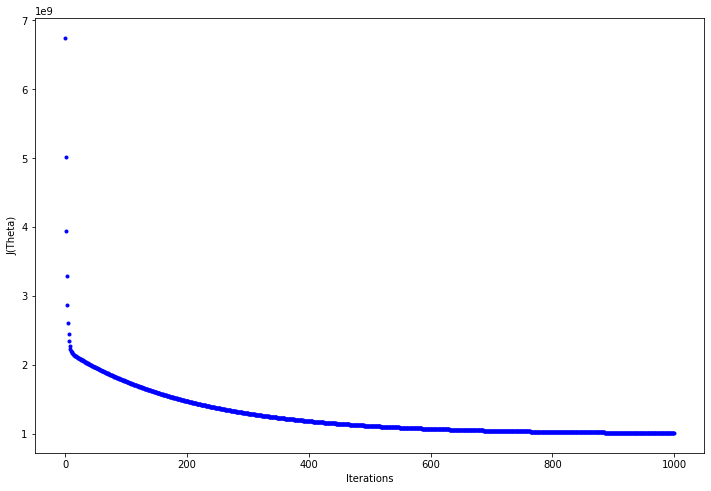

In [35]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),cost_history,'b.')